In [1]:
import cv2
import math
import pickle
import numpy as np

In [2]:
!pip install 'ocrd-fork-pylsd == 0.0.3'
import time
from pylsd.lsd import lsd

In [4]:
from IPython.display import display, Image

def display_cv_image(image, format='.png'):
    decoded_bytes = cv2.imencode(format, image)[1].tobytes()
    display(Image(data=decoded_bytes))

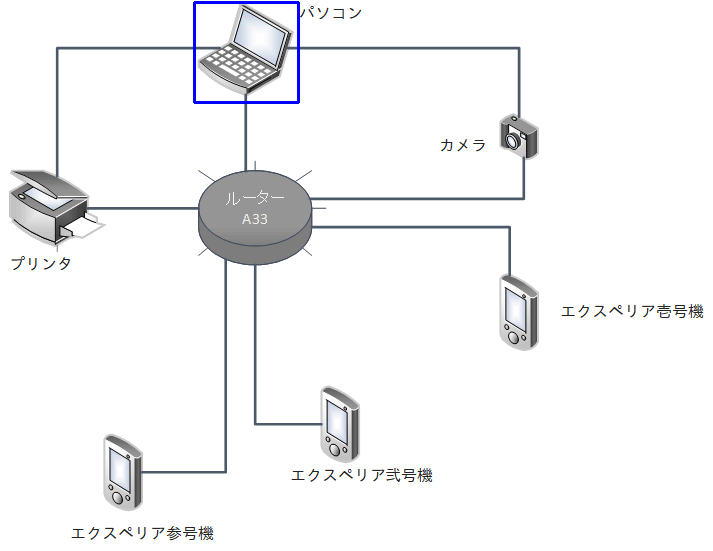

True

In [22]:
#画像をグレースケールで読み込む
imgcol = cv2.imread("./res/ATRMoji00.png",1)
img = cv2.imread("./res/ATRMoji00.png",0)
temp = cv2.imread("./res/ATRMoji01.png", 0)
imgcs = cv2.imread("./res/resultclose.png",0)
#マッチングテンプレートを実行
#比較方法はcv2.TM_CCOEFF_NORMEDを選択
result = cv2.matchTemplate(img, temp, cv2.TM_CCOEFF_NORMED)
#検出結果から検出領域の位置を取得
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc
w, h = temp.shape[::-1]
bottom_right = (top_left[0] + w, top_left[1] + h)
#検出領域を四角で囲んで保存
result = cv2.imread("./res/ATRMoji00.png")
cv2.rectangle(result,top_left, bottom_right, (255, 0, 0), 2)
display_cv_image(result, '.png')
cv2.imwrite("./res/result.png", result)

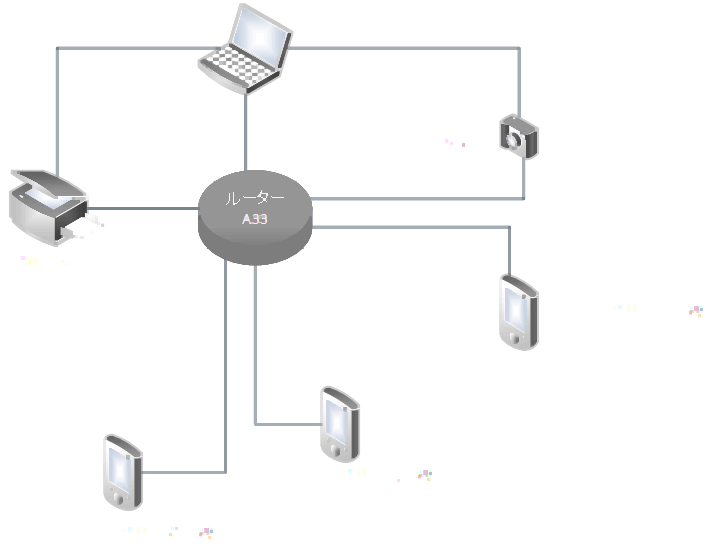

True

In [30]:
imgmol = imgcol.copy()
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(imgmol, cv2.MORPH_CLOSE, kernel)
display_cv_image(opening, '.png')
cv2.imwrite("./res/resultclose2.png", opening)

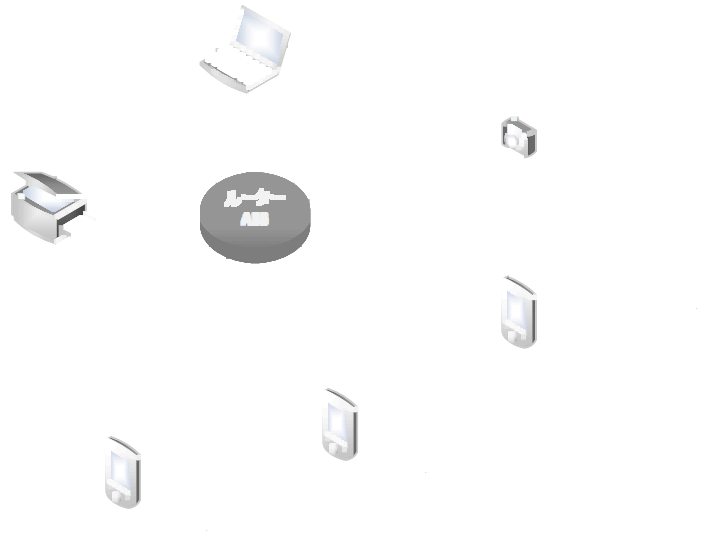

True

In [17]:
imgmol = imgcol.copy()
kernel = np.ones((5,5),np.uint8)
erosion = cv2.dilate(imgmol,kernel,iterations = 1)
display_cv_image(erosion, '.png')
cv2.imwrite("./res/resultddd.png", erosion)

#### 

In [ ]:
#img00 = imgcol.copy()
#img00 = cv2.resize(img00,(int(img00.shape[1]/5),int(img00.shape[0]/5)))
gray = cv2.cvtColor(img00,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(5,5),5)

t1 = time.time()
edges = cv2.Canny(gray,50,150,apertureSize = 3)
linesH = cv2.HoughLinesP(edges, rho=1, theta=np.pi/360, threshold=50, minLineLength=50, maxLineGap=10)
t2 = time.time()

linesL = lsd(gray)
t3 = time.time()

img2 = img00.copy()
for line in linesH:
    x1, y1, x2, y2 = line[0]

    # 赤線を引く
    img2 = cv2.line(img2, (x1,y1), (x2,y2), (0,0,255), 3)

cv2.imwrite('samp_hagh_morpho.jpg',img2)
img3 = img00.copy()
img4 = img00.copy()
for line in linesL:
    x1, y1, x2, y2 = map(int,line[:4])
    img3 = cv2.line(img3, (x1,y1), (x2,y2), (0,0,255), 3)
    if (x2-x1)**2 + (y2-y1)**2 > 1000:
       # 赤線を引く
       img4 = cv2.line(img4, (x1,y1), (x2,y2), (0,0,255), 3)
print("Hagh")
print(len(linesH),"lines")
print(t2-t1,"sec")
print("time per a line :{:.4f}".format((t2-t1)/len(linesH)))
print("LSD")
print(len(linesL),"lines")
print(t3-t2,"sec")
print("time per a line {:.4f}".format((t3-t2)/len(linesL)))
cv2.imwrite('samp_pylsd_morpho.jpg',img3)
cv2.imwrite('samp_pylsd_morpho2.jpg',img4)

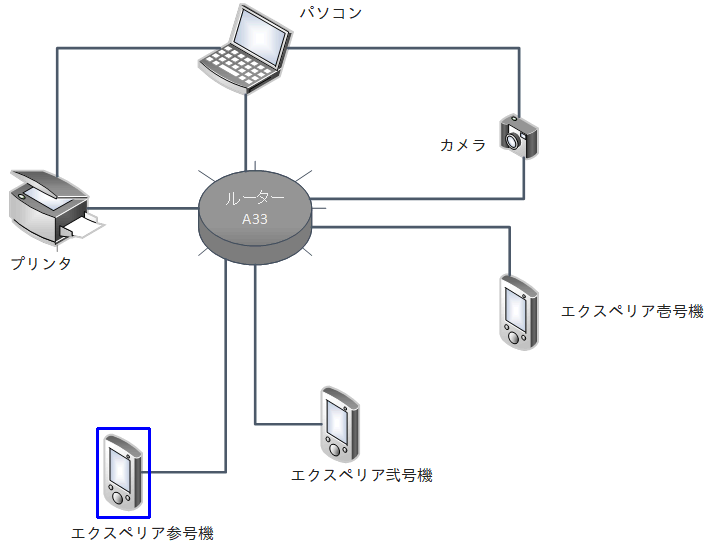

True

In [18]:
#画像をグレースケールで読み込む
imgcol = cv2.imread("./res/resultclose.png",1)
#img = cv2.imread("./res/ATRMoji00.png",0)
temp = cv2.imread("./res/ATRMojiXP.png", 0)
#マッチングテンプレートを実行
#比較方法はcv2.TM_CCOEFF_NORMEDを選択
result = cv2.matchTemplate(img, temp, cv2.TM_CCOEFF_NORMED)
#検出結果から検出領域の位置を取得
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc
w, h = temp.shape[::-1]
bottom_right = (top_left[0] + w, top_left[1] + h)
#検出領域を四角で囲んで保存
result = cv2.imread("./res/ATRMoji00.png")
cv2.rectangle(result,top_left, bottom_right, (255, 0, 0), 2)
display_cv_image(result, '.png')
cv2.imwrite("./res/result.png", result)

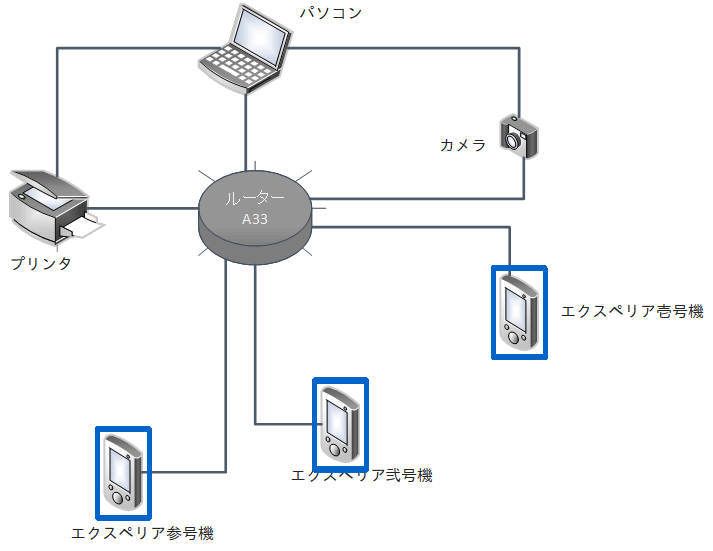

True

In [28]:
temp = cv2.imread("./res/ATRMojiXP.png", 0)
imgcs = cv2.imread("./res/resultclose.png",0)

#マッチングテンプレートを実行
result = cv2.matchTemplate(imgcs, temp, cv2.TM_CCOEFF_NORMED)

#類似度の設定(0~1)
threshold = 0.9
#検出結果から検出領域の位置を取得
loc = np.where(result >= threshold)
#検出領域を四角で囲んで保存
resultI = cv2.imread("./res/ATRMoji00.png")
w, h = temp.shape[::-1]
for top_left in zip(*loc[::-1]):
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(resultI,top_left, bottom_right, (200, 100, 0), 2)
display_cv_image(resultI, '.png')
cv2.imwrite("./res/result2.png", resultI)

In [34]:
img00 = opening.copy()
#img00 = cv2.resize(img00,(int(img00.shape[1]/5),int(img00.shape[0]/5)))
gray = cv2.cvtColor(img00,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(5,5),5)

t1 = time.time()
edges = cv2.Canny(gray,50,150,apertureSize = 3)
linesH = cv2.HoughLinesP(edges, rho=1, theta=np.pi/360, threshold=50, minLineLength=50, maxLineGap=10)
t2 = time.time()

linesL = lsd(gray)
t3 = time.time()

img2 = img00.copy()
for line in linesH:
    x1, y1, x2, y2 = line[0]

    # 赤線を引く
    img2 = cv2.line(img2, (x1,y1), (x2,y2), (0,0,255), 3)

cv2.imwrite('samp_haghA.jpg',img2)
img3 = img00.copy()
img4 = img00.copy()
for line in linesL:
    x1, y1, x2, y2 = map(int,line[:4])
    if (x2-x1)**2 + (y2-y1)**2 > 1200:
        img3 = cv2.line(img3, (x1,y1), (x2,y2), (120,240,0), 3)
        if (x2-x1)**2 + (y2-y1)**2 > 1300:
           # 赤線を引く
           img4 = cv2.line(img4, (x1,y1), (x2,y2), (120,240,0), 3)
print("Hagh")
print(len(linesH),"lines")
print(t2-t1,"sec")
print("time per a line :{:.4f}".format((t2-t1)/len(linesH)))
print("LSD")
print(len(linesL),"lines")
print(t3-t2,"sec")
print("time per a line {:.4f}".format((t3-t2)/len(linesL)))
cv2.imwrite('samp_pylsdA33.jpg',img3)
cv2.imwrite('samp_pylsdA44.jpg',img4)

Hagh
28 lines
0.01022195816040039 sec
time per a line :0.0004
LSD
127 lines
0.12057209014892578 sec
time per a line 0.0009


True